# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Задачи:**

- изучить параметры объектов с помощью графиков и найти закономерности, где это возможно

- изучить количество времени размещения объявлений и найти быстрые и необычно долгие продажи

- найти факторы, сильнее всего влияющие на стоимость объекта

- сравнить стоимость 1 кв.м. в разных населённых пунктах

- найти закономерность зависимости стоимости объектов от расстояния до центра Санкт-Петербурга

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

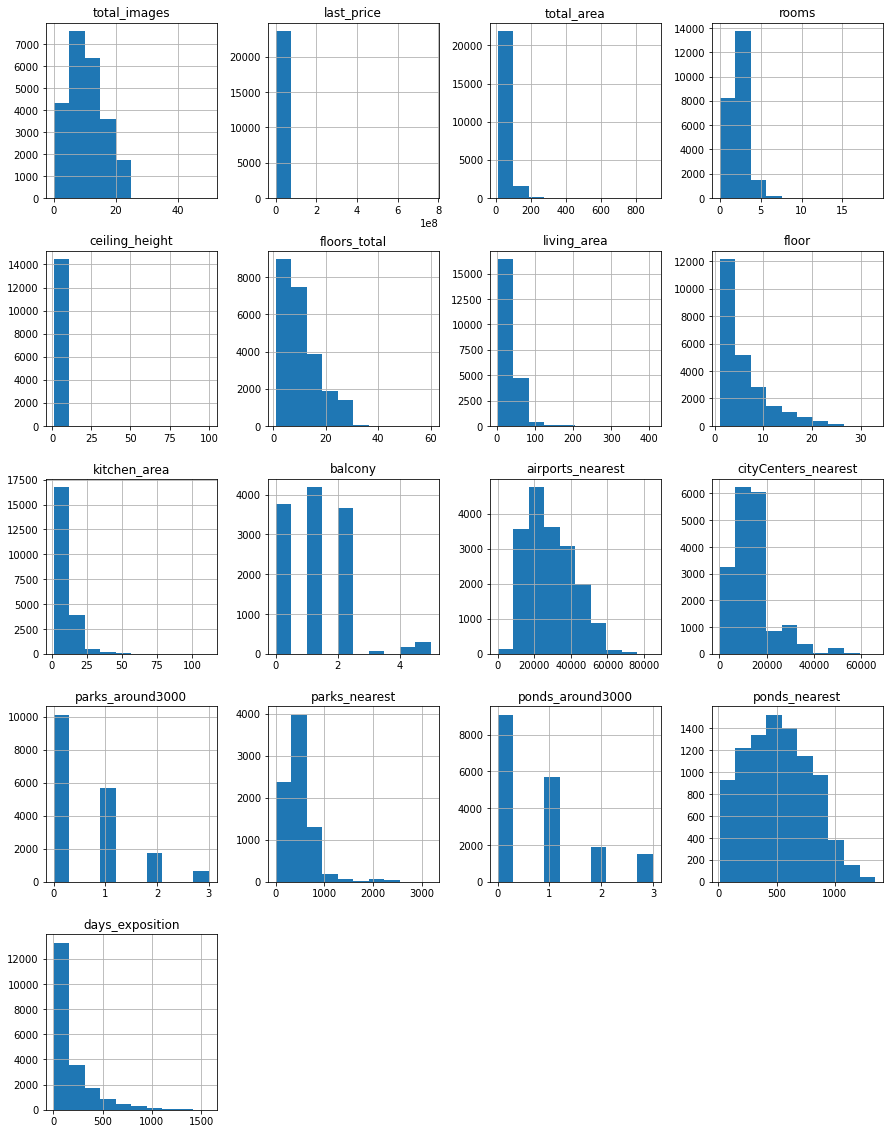

In [3]:
data.hist(figsize=(15, 20));

Общее количество строк в датафрейме - 23699. В большей части столбцов есть отсутствующие значения. Некоторые данные записаны в неподходящем для них типе данных, например, дата.
В столбцах 'last_price', 'total_area', 'rooms', 'ceiling_height', 'kitchen_area', очевидно, есть выбросы, сужающие основнвую массу значений до одного небольшого промежутка.

### Предобработка данных

**1. Найдем и изучим пропущенные значения в столбцах**

In [4]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Определим, в каких столбцах есть пропуски. Найдём их количество.
Так как в некоторых столбцах не пропущено ни одного значения, можно сделать предположение о том, что отсутствуют явные пропуски, вызванные техническими ошибками.

In [5]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Проверим количество пропусков в процентах. 
1) Наибольшее количество пропусков находится в столбце 'is_apartment' - 88% от всех значений.

2) Далее идут пропуски в столбцах 'parks_nearest' и 'ponds_nearest' - 66% и 62% соответственно. *Скорее всего, значения приближены другу, т.к. эти два фактора связаны между собой.*

3) 39% пропусков в столбце 'ceiling_height'. 

4) 23% пропусков в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000'. *На практике эти факторы не связаны между собой, поэтому можно предположить, что пропуски в этих столбцах присутствуют в определённом блоке данных. Например, это могут быть квартиры, находящиеся в маленьких населённых пунктах, в которых нет аэропортов, парков и водоёмов.*

5) Наименьшее количество пропусков присутствуют в столбцах 'kitchen_area' и 'living_area' - 10% и 8% соответственно.

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=2.7)

Заменим все пропуски в колонке 'ceiling_height' на стандартную высоту потолка квартиры - 2,7 метра.
Возможная причина пропусков в этом столбце: пользователи не указывают высоту потолка, потому что сдаваемая квартира имеет стандартные параметры.

In [7]:
data['floors_total'] = data['floors_total'].fillna(value=1)

Предположим, что пропуски в столбце 'floors_total' вызваны тем, что квартиры сдаются в одноэтажных домах и заменим пропущенные значения на 1.
Возможная причина пропусков: пользователи не сочли нужным указывать количество этажей, если квартира сдаётся в одноэтажном доме.

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Заменим пропуски в столбце 'is_apartment' на False, т.к. если значение в этом столбце пропущено, значит, скорее всего, квартира не является апартаментами.
Возможная причина пропусков: пользователи не сочли нужным указывать тип планировки по причине того, что все остальные параметры они уже указали и не считают эту информацию важной.

In [9]:
data['balcony'] = data['balcony'].fillna(value=0)

Заменим пропуски в столбце 'balcony' на значение 0, т.к., логично предположить, если данные о наличии балкона отсутствуют, значит, балкона нет.
Возможная причина пропусков: пользователи не сочли нужным указывать информацию о балконе, если его в квартире нет.

In [10]:
data = data.dropna(subset=['locality_name'])

Удалим все строки, в которых пропущено название населённого пункта, в котором сдаётся квартира. Их всего 49 - это примерно 0,2% всей информации - поэтому они не сильно повлияют на датафрейм с 23699 строк.
Возможная причина пропусков: информация о населённом пункте не обозначена как обязательная, и пользователи забыли указать данные о населённом пункте.

In [11]:
columns = ['parks_around3000', 'ponds_around3000']
for c in columns:
    data[c] = data[c].fillna(value=0)

В столбцах 'parks_around3000', 'ponds_around3000' количество пропущенных значений совпадает. Заменим их на 0, т.к. скорее всего, рядом с квартирами, сдаваемыми в аренду, нет поблизости парков и водоёмов, значит, их количество равно нулю.
Возможная причина пропусков: пользователи не сочли нужным указывать данную информацию.

In [12]:
data['days_exposition'] = data['days_exposition'].fillna(value=0)

 В столбце 'days_exposition' заменим пропущенные значения на 0, т.к. скорее всего, объявления по разным причинам были сняты с публикации в тот же день, в который они были вывешены.
 Возможная причина пропусков: система считает промежуток времени, - количество дней - в который было размещено объявление, не с 0, а с 1.

In [13]:
data['is_apartment'].sum() + data['open_plan'].sum() + data['studio'].sum()

266

Рассмотрим пропуски в столбцах 'living_area' и 'kitchen_area'. Выясним количество квартир, у которых указан тип планировки. Таких квартир очень мало - всего 266 из 23699. Следовательно, почти у всех квартир не указан тип планировки, то есть, заменить пропущенные значения медианным невозможно. Оставим эти значения пустыми, т.к. невозможно предложить логичную замену. 

In [14]:
data.loc[data['parks_around3000'] == 0, 'parks_around3000'].count()

15590

Посчитаем количество строк, у которых значения количества близлежащих парков равно нулю. Их оказалось 15590, что близко к количеству пропущенных значений столбца 'parks_nearest', из чего следует, что пропуски в этом столбце вызваны отсутствием близлежащих парков.

По той же логике можно определить причину пропущенных значений в столбце 'airports_nearest' и 'ponds_nearest'. Пропущенные значения в этих столбцах невозможно заменить на 0, так как данные в этих столбцах отображают расстояние, т.е. если мы заменим пропущенные значения на 0, это может означать, что квартира находится на территории аэропорта, парка или водоёма.

In [15]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.70,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.70,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.70,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Рассмотрим пропущенные значения в столбце **'cityCenters_nearest'**. Важность этого фактора меняется для каждого населённого пункта. Например, для маленького посёлка расстояние до центра не очень важно, т.к. в любом  случае расстояния маленькие. Для большого мегаполиса расстояние до центра очень важно. Максимально уточнить данные можно, заполнив пропущенные значения медианным значением по каждому населённому пункту, но после такой замены квартиры, значения которых близки к медианному, будут приравнены к квартирам с отсутствующими данными, среди которых могут быть как далеко расположенные, так и близко расположенные к центру города квартиры. Это исказит данные и помешает верно обнаружить закономерности в данных, поэтому пустые значения в столбце 'cityCenters_nearest' логичнее всего будет оставить.

Возможная причина пропусков в данных - пользователи не владеют информацией о точном расстоянии до центра города, выраженном в конкретных расстояниях, либо они не сочли нужным её указывать. Скорее всего, они указывают район места расположения квартиры, так как по названию района легче ориентироваться.

In [16]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64

Изучим информацию об обновлённом датафрейме. Остались пропуски:
- в столбцах 'living_area', 'kitchen_area' и 'cityCenters_nearest', пропуски в которых невозможно заполнить
- в столбцах 'airports_nearest', 'parks_nearest', 'ponds_nearest', значения которых невозможно заменить на 0

**2. Рассмотрим типы данных в каждом столбце.**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D')
data['first_day_exposition'].head(10)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

В столбце 'first_day_exposition' присутствуют данные с датами публикации объявлений, в них стоит тип 'object'. Так как это даты, переведём тип данных столбца 'first_day_exposition' в тип 'datetime' из типа 'object' и округлим данные до 1 дня, т.к. время публикации вплоть до секунд не влияет на исследование.

In [19]:
columns_int = ['floors_total', 'balcony', 'parks_around3000','ponds_around3000', 'days_exposition']
for x in columns_int:
    data[x] = data[x].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

Определим столбцы, данные которых по логике не могут принимать дробные значения, такие как 'floors_total', 'balcony' и т.д., и заменим их тип данных из 'float' на 'int'.

**3. Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.**

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
def rename(name):
    for i in range(len(name)):
        if name[i].isupper()==True:
            return name[i:len(name)]
data['locality_name'] = data['locality_name'].apply(rename)

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Найдём и устраним неявные дубликаты в столбце 'locality_name'.

**4. Найдём и устраним редкие и выбивающиеся значения.**

**1) Столбец 'total_images'**

In [23]:
display(data['total_images'].max())
display(data['total_images'].min())

50

0

Количество фотографий может быть каким угодно. Оставим данные без изменений.

**2) Столбец 'last_price'**

763000000.0

12190.0

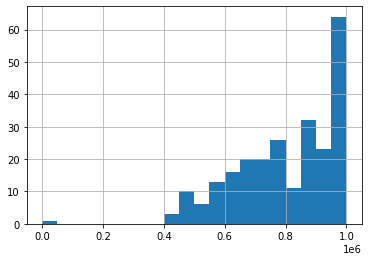

In [24]:
display(data['last_price'].max())
display(data['last_price'].min())
data['last_price'].hist(range=(0, 1000000), bins=20);

Рассмотрим столбец 'last_price'. Найдём минимальное и максимальное значения. Максимальное значение - 763 млн.руб. Минимальное значение - 12190 руб. - неправдоподобно маленькое значение. Построим гистограмму для цен на квартиры в диапазоне до 1 млн.руб.
На гистограмме можно увидеть промежуток с небольшим количеством значений от 0 до 200 тыс. рублей, после которого идёт большой пустой промежуток.

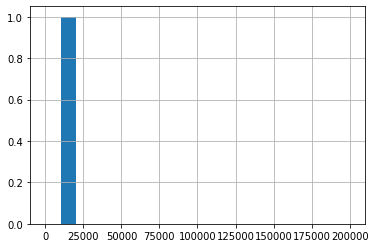

In [25]:
data['last_price'].hist(range=(0, 200000), bins=20);

Рассмотрим значения меньше 200 тыс., так как, очевидно, это выбросы значений.

In [26]:
data = data.query('last_price > 200000')

На гистограмме можно увидеть, что аномальное значение всего одно. Удалим его.

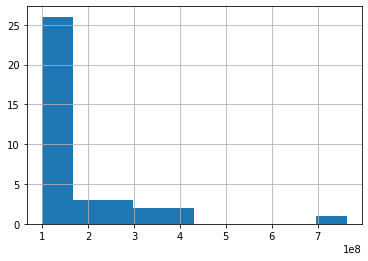

In [27]:
data['last_price'].hist(bins=10, range=(100000000, 763000000));

Изучим гистограмму со стороны больших значений. Построим гистограмму с диапазоном от 100 млн до максимального значения - 763 млн. Можно увидеть большой промежуток между пиком со снижающимися значениями и значениями от примерно 700 млн до максимального значения. Скорее всего, эти значения являются выбросами.

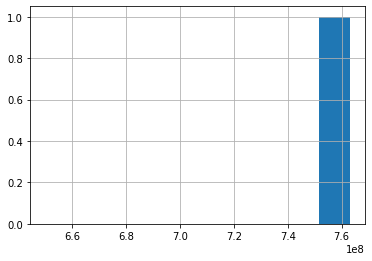

In [28]:
data['last_price'].hist(bins=10, range=(650000000, 763000000));

Рассмотрим значения больше 650 млн.

In [29]:
data = data.query('last_price < 650000000')

Аномальное значение всего одно. Удалим его.

**3) Столбец 'total_area'**

12.0

900.0

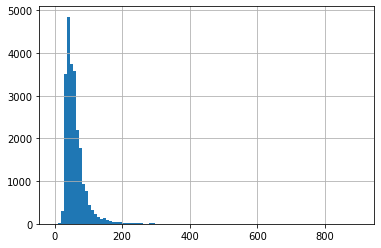

In [30]:
display(data['total_area'].min())
display(data['total_area'].max())
data['total_area'].hist(range=(0, 900), bins=100);

Рассмотрим столбец 'total_area'. Найдём минимальное и максимальное значения и построим гистограмму по промежутку (0, 400). Этот промежуток был выбран, так как на первой гистограмме по данному столбцу было видно, что значения в этом столбце не превышают данное значение.

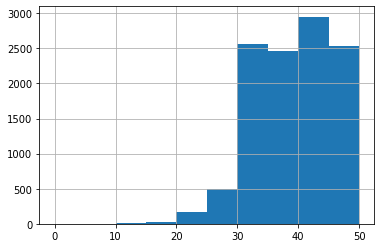

In [31]:
data['total_area'].hist(range=(0, 50), bins=10);

Рассмотрим гистограмму со стороны меньших значений. Выбивающихся значений нет, оставляем данные без изменений.

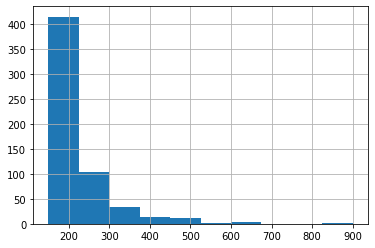

In [32]:
data['total_area'].hist(range=(150, 900), bins=10);

Рассмотрим гистограмму со стороны больших значений. Можно увидеть небольшое количество выбивающихся значений в диапазоне от 800 кв.м. до 900 кв.м. Скорее всего, это выбросы.

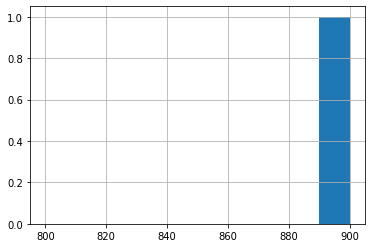

In [33]:
data['total_area'].hist(range=(800, 900));

In [34]:
data = data.query('total_area < 800')

Выбивающееся значение всего одно. Удалим его.

**4) Столбец 'rooms'**

0

19

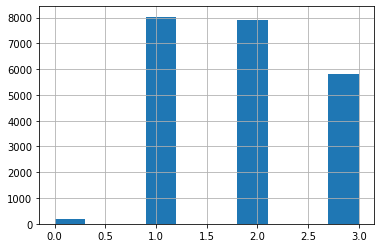

In [35]:
display(data['rooms'].min())
display(data['rooms'].max())
data['rooms'].hist(range=(0, 3));

Найдём минимальное и максимальное значения столбца 'rooms'. Построим гистограмму со стороны меньших значений, - на ней можно увидеть небольшое количество значений меньше 1. Количество комнат не может быть меньше 1, значит, эти значения являются выбросами.

In [36]:
data.loc[data['rooms'] < 1, 'rooms'].count()

197

Найдём количество аномальных значений - 197 строк. Рассмотрим их.

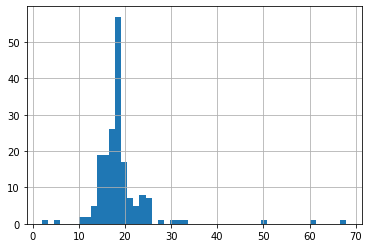

In [37]:
data.loc[data['rooms'] < 1, 'living_area'].hist(bins=50);

Построим гистограмму значений столбца 'living_area' у квартир, количество комнат которых меньше 1. Большинство значений приходится на промежуток от 10 кв.м. до 30 кв.м. 

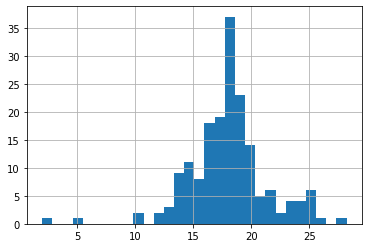

In [38]:
data.loc[(data['rooms'] < 1) &(data['living_area'] < 30), 'living_area'].hist(bins=30);

Рассмотрим этот промежуток ближе. Большая часть значений приходится на промежуток от 10 кв.м. до 27.5 кв.м.. Значения из этого промежутка отделены от остальных значений большим разрывом.

In [39]:
data.loc[(data['rooms'] < 1) &(data['living_area'] < 27.5) & (data['living_area'] < 10)] = 1

Скорее всего, значение 0 в столбце 'rooms' по ошибке указано пользователями в характеристиках однокомнатных квартир. Заменим значение количества комнат квартир из этого промежутка на 1. Остальные значения удалим, т.к. их мало и они имеют неправдоподобно маленькие или большие значения жилой площади.

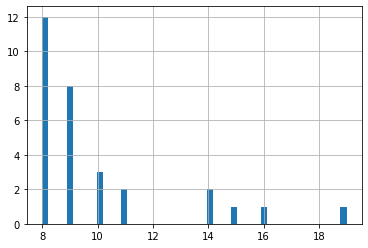

In [40]:
data['rooms'].hist(range=(8, 19), bins=50);

Построим гистограмму со стороны больших значений. На ней можно увидеть небольшое количество значений больше 10. Найдём их количество.

In [41]:
data.loc[data['rooms'] > 10, 'rooms'].count()

7

In [42]:
data = data.query('rooms < 10')

Количество значений больше 10 составляет всего три строки. Удалим их.

**5) Столбец 'ceiling_height'**

1.0

100.0

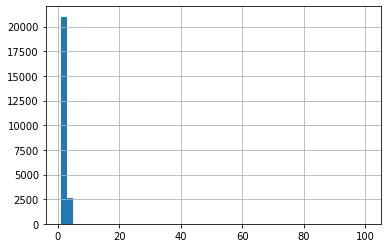

In [43]:
display(data['ceiling_height'].min())
display(data['ceiling_height'].max())
data['ceiling_height'].hist(bins=50);

Найдём минимальное и максимальное значения столбца 'ceiling_height'. В данных, очевидно, есть выбросы.

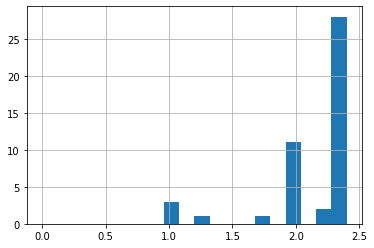

In [44]:
data['ceiling_height'].hist(range=(0, 2.4), bins=20);

Рассмотрим гистограмму со стороны меньших значений. Можно заметить небольшое количество выбивающихся значений меньше 2 метров.

In [45]:
data = data.query('ceiling_height > 2')

Логичную замену значениям меньше 2 м предложить невозможно. Удалим эти значения.

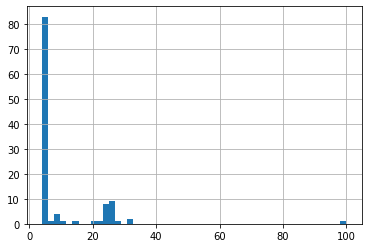

In [46]:
data['ceiling_height'].hist(range=(4, 100), bins=50);

В промежутке от примерно 15 м до 40 м можно заметить небольшой пик значений.

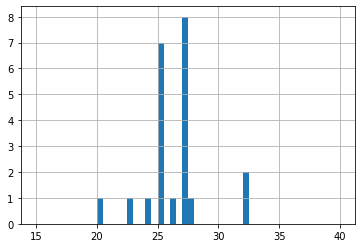

In [47]:
data = data.loc[data['ceiling_height'] < 40]
data['ceiling_height'].hist(range=(15, 40), bins=50);

Рассмотрим его ближе. Значениям от 20 м до 35 м можно предложить логичную замену - эти же значения, умноженные на 0.1, т.к., скорее всего, это вещественные числа, которые по ошибке были записаны без разделительного знака.

In [48]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] *= 0.1

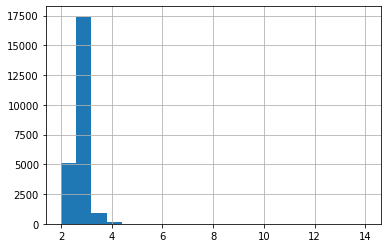

In [49]:
data['ceiling_height'].hist(bins=20);

Построим гистограмму по изменённым данным. Можно заметить, что выбивающиеся значения, которым невозможно предложить логичную замену, всё ещё остались, но их осталось небольшое количество. Рассмотрим гистограмму ближе со стороны больших значений, чтобы можно было определить предельное значение невыбивающихся значений.

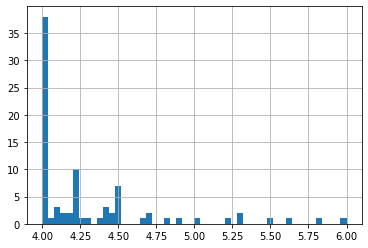

In [50]:
data['ceiling_height'].hist(range=(4, 6), bins=50);

In [51]:
data = data.query('ceiling_height <= 4.5')

На гистограмме можно заметить резкое снижение количества значений примерно после отметки 4.5 метра. Скорее всего, это выбивающиеся значения, которым невозможно предложить логичную замену. Удалим их.

**6) Столбец 'floors_total'**

In [52]:
display(data['floors_total'].min())
display(data['floors_total'].max())

1

60

Найдём минимальное и максимальное значения. Со стороны меньших значений аномалий нет, изучим гистограмму со стороны больших значений.

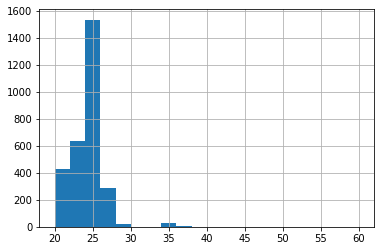

In [53]:
data['floors_total'].hist(range=(20, 60), bins=20);

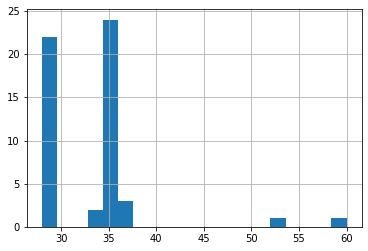

In [54]:
data['floors_total'].hist(range=(28, 60), bins=20);

Для большей наглядности рассмотрим гистограмму ближе.

In [55]:
data = data.query('floors_total < 40')

Со стороны больших значений можно увидеть выбивающиеся редкие значения, превышающие значение 40. Удалим их.

**7) Столбец 'living_area'**

2.0

332.0

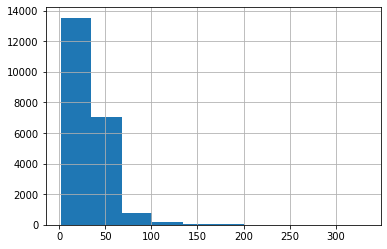

In [56]:
display(data['living_area'].min())
display(data['living_area'].max())
data['living_area'].hist();

Рассмотрим столбец 'living_area'. Минимальное значение - 2 м. Неправдоподобно маленькое значение.

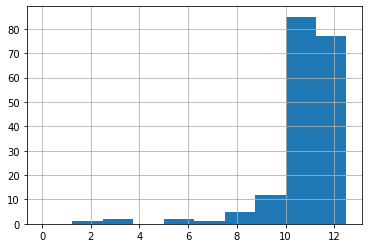

In [57]:
data['living_area'].hist(range=(0, 12.5));

In [58]:
data.loc[data['living_area'] < 4, 'living_area'] = 'drop'
data = data.query('living_area != "drop"')

Рассмотрим гистограмму со стороны меньших значений. Можно увидеть выбивающиеся аномальные значения. Удалим их.

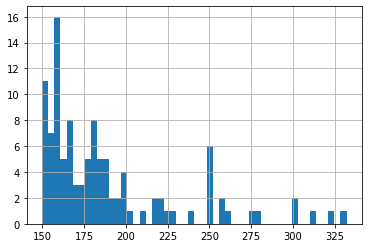

In [59]:
data['living_area'].hist(range=(150, 332), bins=50);

Со стороны больших значений аномалий не видно. Оставим данные без изменений.

**8) Столбец 'floor'**

In [60]:
display(data['floor'].min())
display(data['floor'].max())

1

33

В столбце 'floor' аномалий нет. Оставим данные без изменений.

**9) Столбец 'kitchen_area'**

1.3

107.0

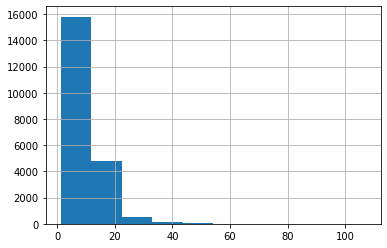

In [61]:
display(data['kitchen_area'].min())
display(data['kitchen_area'].max())
data['kitchen_area'].hist();

Рассмотрим гистограмму. Можно заметить, что гистограмма заканчивается на значении больше 100, что значит, в этом промежутке присутствуют редкие большие значения.

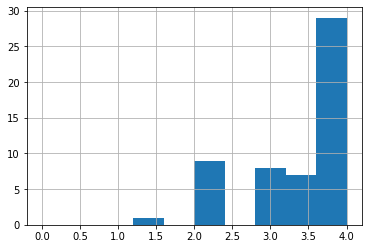

In [62]:
data['kitchen_area'].hist(range=(0, 4));

Рассмотрим гистограмму со стороны меньших значений. Можно заметить небольшое количество выбивающихся значений меньше 2.5. Удалим их.

In [63]:
data.loc[data['kitchen_area'] < 2.5, 'kitchen_area'] = 'drop'
data = data.query('kitchen_area != "drop"')

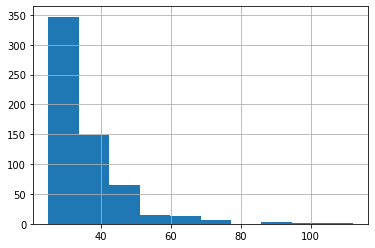

In [64]:
data['kitchen_area'].hist(range=(25, 112));

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23586 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23586 non-null  int64  
 1   last_price            23586 non-null  float64
 2   total_area            23586 non-null  float64
 3   first_day_exposition  23586 non-null  object 
 4   rooms                 23586 non-null  int64  
 5   ceiling_height        23586 non-null  float64
 6   floors_total          23586 non-null  int64  
 7   living_area           21693 non-null  object 
 8   floor                 23586 non-null  int64  
 9   is_apartment          23586 non-null  object 
 10  studio                23586 non-null  object 
 11  open_plan             23586 non-null  object 
 12  kitchen_area          21328 non-null  object 
 13  balcony               23586 non-null  int64  
 14  locality_name         23586 non-null  object 
 15  airports_nearest   

Рассмотрим гистограмму со стороны больших значений. Сильно выбивающихся значений нет, оставляем данные без изменений.

**10) Столбец 'balcony'**

In [66]:
display(data['balcony'].min())
display(data['balcony'].max())

0

5

Рассмотрим столбец 'balcony'. Найдём минимальное и максимальное значения. Максимальное значение - 5 балконов - выглядит нереалистично.

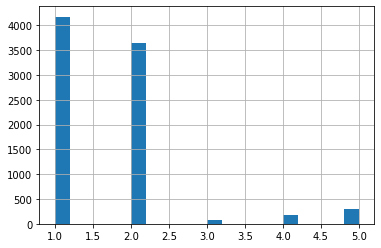

In [67]:
data['balcony'].hist(range=(1, 5), bins=20);

Изучим гистограмму. Значений 3, 4 и 5 балконов меньше всего. Их можно назвать аномальными, потому что в реальности наличие у квартиры 5 балконов маловероятно.

In [68]:
display(data.query('balcony == 4 or balcony == 5')['balcony'].count())

485

Найдём количество квартир с указанными значениями 4 и 5 балконов. 449 строк - слишком большое значение. Изучим эти данные более подробно.

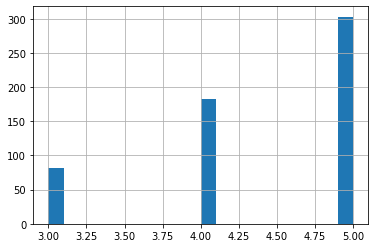

In [69]:
data['balcony'].hist(range=(3, 5), bins=20);

Изучим гистограмму значений от 3 до 5 балконов. Можно заметить, что количество квартир с 3 балконами заметно меньше количества квартир с 4 и 5 балконами. На основе этого можно предположить, что значения 4 и 5 повторяются чаще, по причине опечаток - на цифровой клавиатуре цифра '4' находится рядом с цифрой '1', а цифра '5' находится рядом с цифрой '2', поэтому пользователи чаще ошибались при заполнении этих данных. Цифра '3' находится чуть дальше, поэтому на это значение приходится меньше данных.

In [70]:
data.loc[data['balcony'] == 4, 'balcony'] = 1
data.loc[data['balcony'] == 5, 'balcony'] = 2

Заменим данные на более правдоподобные.

In [71]:
data.query('balcony == 3')['balcony'].count()

81

Невозможно определить, реалистичны ли данные о квартирах с тремя балконами, или были заполнены по ошибке. найдём их количество - всего 57 строк.

In [72]:
data = data.query('balcony != 3')

57 строк не повлияют на общий результат, это слишком маленькое количество. Удалим эти строки.

**11) Столбец 'airports_nearest'**

In [73]:
display(data['airports_nearest'].min())
display(data['airports_nearest'].max())

0.0

84869.0

Рассмотрим столбец 'airports_nearest'. Найдём минимальное и максимальное значения. Минимальное значение - 0 км, это аномальное значение. Рассмотрим гистограмму значений.

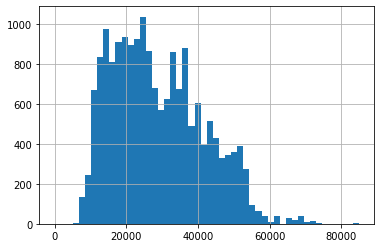

In [74]:
data['airports_nearest'].hist(bins=50);

Распределение выглядит нормально. Рассмотрим гистограмму со стороны меньших значений.

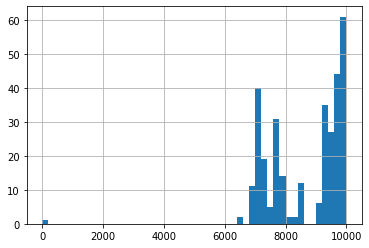

In [75]:
data['airports_nearest'].hist(range=(0, 10000), bins=50);

На гистограмме можно увидеть аномальные выбивающиеся значения. Удалим их.

In [76]:
data.loc[data['airports_nearest'] < 6000, 'airports_nearest'] = 'drop'
data = data.query('airports_nearest != "drop"')

Со стороны больших значений аномалий нет или определить их невозможно - расстояние до аэропорта может быть 84869 м, то есть примерно 85 км. Оставим данные без изменений.

**12) Столбец 'cityCenters_nearest'**

181.0

65968.0

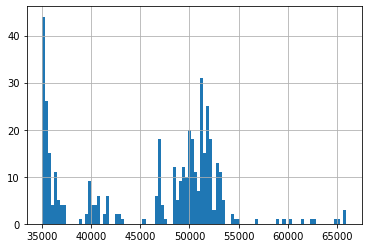

In [77]:
display(data['cityCenters_nearest'].min())
display(data['cityCenters_nearest'].max())
data['cityCenters_nearest'].hist(range=(35000, 65968), bins=100);

Изучим данные столбца 'cityCenters_nearest'. На гистограмме можно заметить небольшое количество больших значений.

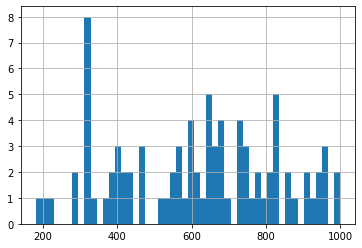

In [78]:
data['cityCenters_nearest'].hist(range=(181, 1000), bins=50);

Рассмотрим гистограмму со стороны меньших значений. Аномалий не видно, оставляем данные без изменений.

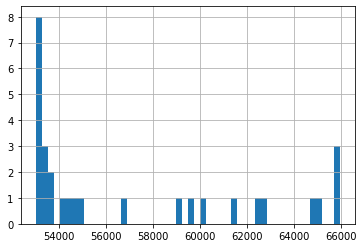

In [79]:
data['cityCenters_nearest'].hist(range=(53000, 65968), bins=50);

Рассмотрим данные со стороны больших значений. Можно заметить, что со значения 54000 количество значений резко снижается. Рассмотрим этот промежуток подробнее.

In [80]:
data.loc[data['cityCenters_nearest'] > 54000, 'locality_name'].unique()

array(['Зеленогорск', 'Молодёжное', 'Ломоносов'], dtype=object)

Найдём названия населённых пунктов, в которых записаны эти значения. Зеленогорск, Молодёжное, Ломоносов - маленькие населённые пункты, расстояние до центра города 54 км маловероятно. Так как этих значений не так много, удалим их.

In [81]:
data.loc[data['cityCenters_nearest'] > 54000, 'cityCenters_nearest'] = 'drop'
data = data.query('cityCenters_nearest != "drop"')

Данные в оставшихся столбцах - 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' и 'days_exposition' - не требуют изменений, т.к. гистограммы по этим данным выглядят ожидаемо. Оставим данные в этих столбцах без изменений.

In [82]:
data.drop_duplicates().reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07 00:00:00,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0
1,7,3350000.0,40.40,2018-12-04 00:00:00,1,2.70,11,18.6,1,False,...,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.00,2015-08-20 00:00:00,2,2.70,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.00,2015-07-24 00:00:00,3,2.70,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.00,2018-06-19 00:00:00,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23483,9,9700000.0,133.81,2017-03-21 00:00:00,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,0
23484,14,3100000.0,59.00,2018-01-15 00:00:00,3,2.70,5,38.0,4,False,...,8.5,0,Тосно,NaN,NaN,0,NaN,0,NaN,45
23485,18,2500000.0,56.70,2018-02-11 00:00:00,2,2.70,3,29.7,1,False,...,NaN,0,Рождествено,NaN,NaN,0,NaN,0,NaN,0
23486,13,11475000.0,76.75,2017-03-28 00:00:00,2,3.00,17,NaN,12,False,...,23.3,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602


Удалим явные дубликаты и обновим индексы.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23488 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23488 non-null  int64  
 1   last_price            23488 non-null  float64
 2   total_area            23488 non-null  float64
 3   first_day_exposition  23488 non-null  object 
 4   rooms                 23488 non-null  int64  
 5   ceiling_height        23488 non-null  float64
 6   floors_total          23488 non-null  int64  
 7   living_area           21601 non-null  object 
 8   floor                 23488 non-null  int64  
 9   is_apartment          23488 non-null  object 
 10  studio                23488 non-null  object 
 11  open_plan             23488 non-null  object 
 12  kitchen_area          21234 non-null  object 
 13  balcony               23488 non-null  int64  
 14  locality_name         23488 non-null  object 
 15  airports_nearest   

В датафрейме после предобработки данных осталось 23488 строк.

### Посчитайте и добавьте в таблицу новые столбцы

In [84]:
data['1_m_price'] = data['last_price'] / data['total_area']

Найдём цену одного квадратного метра.

In [85]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D')

In [86]:
data['weekday'] = data['first_day_exposition'].dt.weekday

Найдём день недели публикации объявления.

In [87]:
data['month'] = data['first_day_exposition'].dt.month

Найдём месяц публикации объявления.

In [88]:
data['year'] = data['first_day_exposition'].dt.year

Найдём год публикации объявления.

In [89]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else: return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

Найдём тип этажа квартиры.

In [90]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] // 1000

Найдём расстояние до центра города в километрах.

In [127]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('Int64')

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23488 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23488 non-null  int64         
 1   last_price              23488 non-null  float64       
 2   total_area              23488 non-null  float64       
 3   first_day_exposition    23488 non-null  datetime64[ns]
 4   rooms                   23488 non-null  int64         
 5   ceiling_height          23488 non-null  float64       
 6   floors_total            23488 non-null  int64         
 7   living_area             21601 non-null  float64       
 8   floor                   23488 non-null  int64         
 9   is_apartment            23488 non-null  object        
 10  studio                  23488 non-null  object        
 11  open_plan               23488 non-null  object        
 12  kitchen_area            21234 non-null  float6

**4. Проведём исследовательский анализ данных**

**1) Изучим параметры объектов**

12.0

631.2

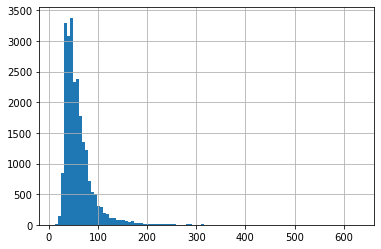

In [93]:
display(data['total_area'].min())
display(data['total_area'].max())
data['total_area'].hist(bins=100);

Наибольшее количество значений приходится на промежуток от 17 кв.м до 100 кв.м. Пик значений приходится на середину промежутка - от 30 кв.м. до 60 кв.м. Чаще всего продаются квартиры, близкие по площади к "хрущёвкам".
Наименьшие количества значений приходятся на самые маленькие и самые большие площади. 
После пика со стороны больших значений их количество плавно снижается. Видна зависимость количества объявлений от площади квартиры - чем больше площадь квартир, тем реже их продают, и квартиры, сильно отличающиеся от стандартного значения, продаются редко.
Со стороны меньших значений количество снижается резко. То есть, если площадь квартиры хотя бы на немного меньше минимального стандартного значения, она будет продаваться с гораздо более низкой вероятностью.

5.4

332.0

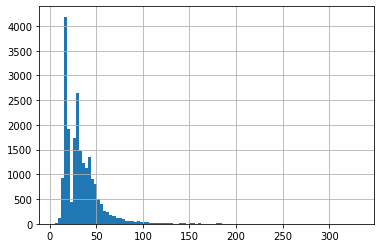

In [94]:
display(data['living_area'].min())
display(data['living_area'].max())
data['living_area'].hist(bins=100);

Наибольшее количество значений приходится на промежуток от 0 кв.м до 50 кв.м. Пик значений приходится на середину промежутка - от 20 кв.м. до 40 кв.м. Гистограмма по значениям жилой площади имеет примерно такой же вид, как гистограмма по значениям общей площади квартиры, что вполне ожидаемо. Однако виден провал значений около середины промежутка (0, 50). Это может быть вызвано тем, что какое-то количество квартир имеют одинаковую общую площадь, но разные жилые площади. Скорее всего, этот провал вызван наличием в датафрейме данных о квартирах-студиях или квартирах без ванных.

2.89

107.0

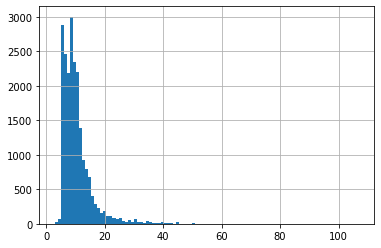

In [95]:
display(data['kitchen_area'].min())
display(data['kitchen_area'].max())
data['kitchen_area'].hist(bins=100);

Гистограмма данных о площади кухни имеет примерно такой же вид, как гистограмма по общей площади. Пик значений приходится на середину промежутка (0, 20) - примерно от 5 кв.м. до 15 кв.м.

430000.0

330000000.0

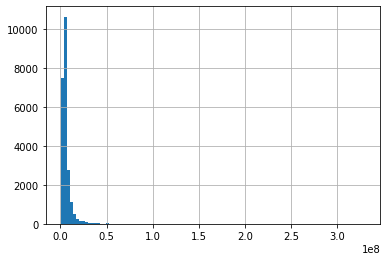

In [96]:
display(data['last_price'].min())
display(data['last_price'].max())
data['last_price'].hist(bins=100);

Гистограмма данных о цене квартиры похожа на гистограммы данных о площади квартиры. Это ожидаемо, т.к. цена квартиры напрямую зависит от её площади.

0

9

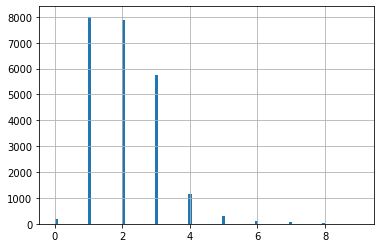

In [97]:
display(data['rooms'].min())
display(data['rooms'].max())
data['rooms'].hist(bins=100);

Чаще всего продаются 1, 2-х и 3-х комнатные квартиры. Одно- и двухкомнатные квартиры продаются значительно чаще, чем трёхкомнатные. Квартир с количеством комнат больше 3 гораздо меньше.

2.0

4.5

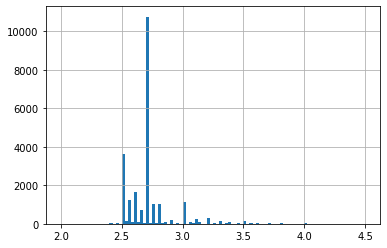

In [98]:
display(data['ceiling_height'].min())
display(data['ceiling_height'].max())
data['ceiling_height'].hist(bins=100);

Большинство значений приходится примерно на 2.7 м. Это значение мы указывали в  пропусках, как стандартное. Абсолютное большинство значений находится рядом со стандартным в промежутке от примерно 2.5 м до примерно 2.8 м.
Более низкие или высокие потолки очень редки.

1

33

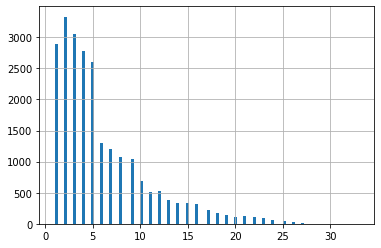

In [99]:
display(data['floor'].min())
display(data['floor'].max())
data['floor'].hist(bins=100);

Чаще всего продаются квартиры на первых пяти этажах. У этого могут быть две причины: квартиры продаются чаще всего в 5-этажных домах, и/или квартиры продаются чаще именно на первых этажах.
В многоэтажных домах на верхних этажах квартиры продаются заметно реже.

'другой'

'последний'

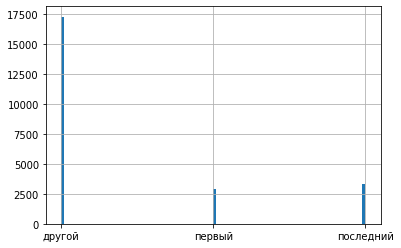

In [100]:
display(data['floor_type'].min())
display(data['floor_type'].max())
data['floor_type'].hist(bins=100);

Квартиры на первом и последнем этажах продаются примерно в 6 раз реже, чем квартиры на других этажах.

1

36

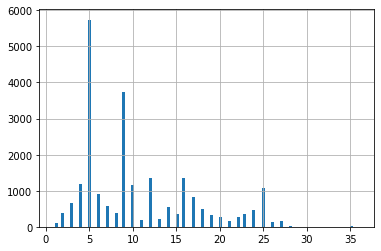

In [101]:
display(data['floors_total'].min())
display(data['floors_total'].max())
data['floors_total'].hist(bins=100);

Чаще всего квартиры продаются в стандартных 5- и 9-этажных домах.

181.0

53568.0

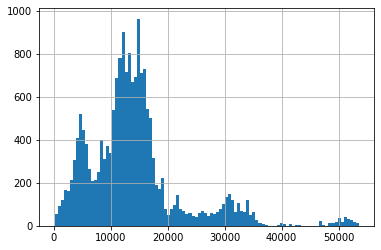

In [102]:
display(data['cityCenters_nearest'].min())
display(data['cityCenters_nearest'].max())
data['cityCenters_nearest'].hist(bins=100);

Чаще всего продаются квартиры, расположенные на среднем расстоянии от центра города. Скорее всего, это спальные районы. Квартиры, расположенные от центра дальше, чем на 20 км, продаются заметно реже.

6450.0

72469.0

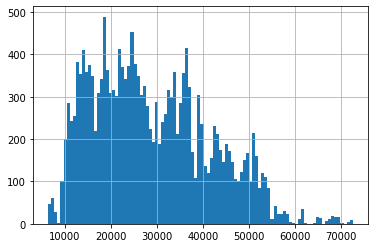

In [103]:
display(data['airports_nearest'].min())
display(data['airports_nearest'].max())
data['airports_nearest'].hist(bins=100);

Абсолютное большинство квартир расположены от аэропортов на расстоянии от 10 км до 60 км. Однако квартир, расположенных немного дальше от аэропортов, меньше, чем расположенных ближе. Так как аэропорты обычно находятся на окраинах городов, можно заметить, что квартиры, расположенные ближе к центру города, продаются немного реже.

13.0

1344.0

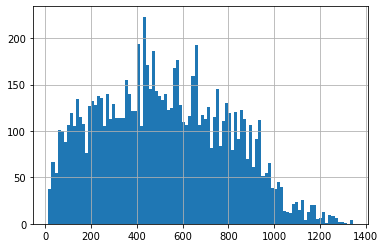

In [104]:
display(data['ponds_nearest'].min())
display(data['ponds_nearest'].max())
data['ponds_nearest'].hist(bins=100);

У большинства квартир водоёмы расположены в радиусе 1 км.

Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

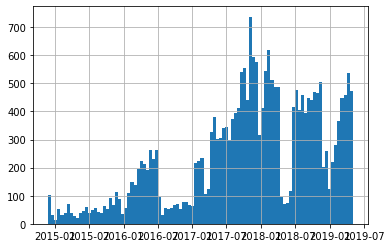

In [105]:
display(data['first_day_exposition'].min())
display(data['first_day_exposition'].max())
data['first_day_exposition'].hist(bins=100);

На гистограмме нельзя увидеть зависимость количества продаж от времени года - большое количество продаж может быть как в первой половине года, так и во второй.
Единственная закономерность, которую можно заметить - это то, что ровно в середине года продажи резко падают, затем резко возрастают.

1

12

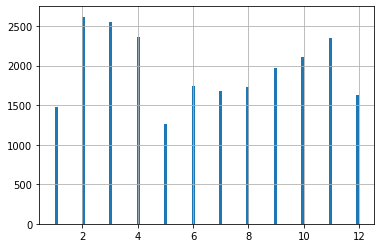

In [106]:
display(data['month'].min())
display(data['month'].max())
data['month'].hist(bins=100);

Наибольшее количество объявлений размещается в весенний и осенний периоды.
Наименьшее количество объявлений размещается в зимний и летний периоды.

**2) Изучим, как быстро продавались квартиры**

0

1572

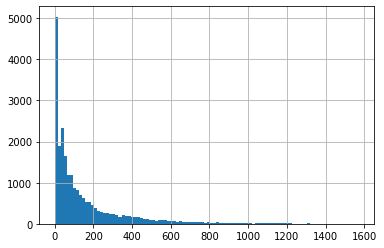

In [107]:
display(data['days_exposition'].min())
display(data['days_exposition'].max())
data['days_exposition'].hist(bins=100);

На гистограмме видно, что наибольшее количество квартир были проданы за короткий промежуток времени. С увеличением количества дней размещения объявления уменьшается количество проданных квартир.

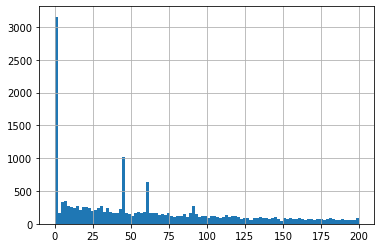

In [108]:
data['days_exposition'].hist(range=(0, 200), bins=100);

Рассмотрим ближе промежуток с меньшими значениями. Наибольшее количество значений приходится на 0, дальше значения медленно понижаются. Это значит, чаще всего квартиры продаются или объявления об их продаже снимаются почти сразу же. Такие продажи можно считать быстрыми.

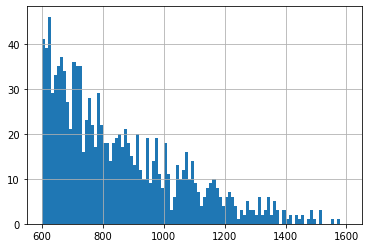

In [109]:
data['days_exposition'].hist(range=(600, 1600), bins=100);

Рассмотрим промежуток с большими значениями. Долгих продаж, которые были размещены очень большой промежуток времени, гораздо меньше, чем быстрых. Начиная с отметки 600 дней, количество продаж перестаёт уменьшаться стремительно, т.к. оно принимает недостаточно большое для этого значение. Из этого следует, что примерно на 600-й день продажи становятся редкими, поэтому их можно считать необычно долгими.

In [110]:
display(data['days_exposition'].mean())
data['days_exposition'].median()

156.30900885558583

73.0

Среднее значение и медианное значение сильно отличаются. Это вызвано присутствием в выборке редких больших значений от примерно 600 до 1572 дней.

<AxesSubplot:>

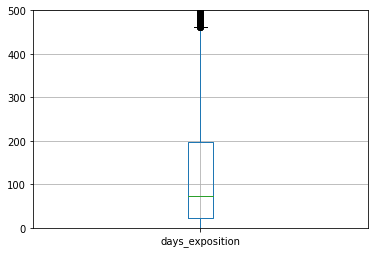

In [111]:
import matplotlib.pyplot as plt 

plt.ylim(0, 500)
plt.xlim(0, 2)
data.pivot_table(index=data.index, values='days_exposition').boxplot()

In [112]:
data.pivot_table(index=data.index, values='days_exposition').describe()

,days_exposition
count,23488.000000
mean,156.309009
std,213.269799
min,0.000000
25%,22.000000
50%,73.000000
75%,198.000000
max,1572.000000


Рассмотрим диаграмму размаха и список характерных значений столбца 'days_exposition'.

Найдём границу нормального размаха:
1) найдем межквартильный размах, чтобы найти расстояние от 75% до 100%: (75% - 25%) * 1,5 = (198 - 22) * 1,5 = 264
2) Найдём значение 100%: 75% + 264 = 198 + 264 = 462 - граница нормального размаха. Значения, превышающие его - выбросы.

Найдём медиану - 73 дня.

Из этого следует:
- продажи, длившиеся больше, чем 462 дня, считаются необычно долгими
- продажи, длившиеся меньше, чем 73 дня, считаются быстрыми

**3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

*1) 'total_area', 'living_area', 'kitchen_area', 'last_price'*

In [113]:
data['living_area'] = data['living_area'].astype('float')
data['kitchen_area'] = data['kitchen_area'].astype('float')

In [114]:
data_table_area = data.pivot_table(index=data.index, values=['total_area', 'living_area', 'kitchen_area', 'last_price'])
data_table_area.corr()

,kitchen_area,last_price,living_area,total_area
kitchen_area,1.000000,0.526373,0.408909,0.597641
last_price,0.526373,1.000000,0.613351,0.704868
living_area,0.408909,0.613351,1.000000,0.936968
total_area,0.597641,0.704868,0.936968,1.000000


Общая площадь квартиры имеет наибольший коэффициент корреляции с ценой - 0,7. Цена квартиры зависит от её площади, однако коэффициент их корреляции не имеет ожидаемо большее значение, т.к. очень важны остальные характеристики квартиры.
Жилая площадь также коррелирует с ценой.
Площадь кухни имеет чуть меньшее значение корреляции с ценой, чем жилая площадь.

Характеристики квартиры, которые, возможно, влияют на её стоимость: наличие и расстояние до аэропортов, парков, водоёмов. Также это могут быть другие условия - больницы, детские сады, школы, транспорт и т.д.

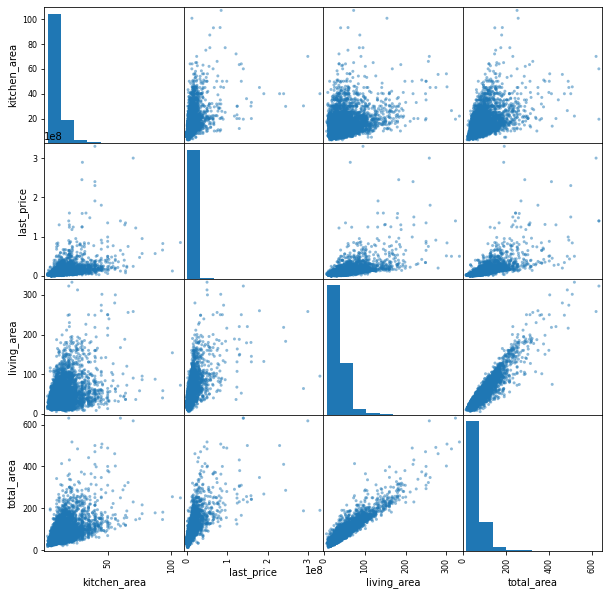

In [115]:
pd.plotting.scatter_matrix(data_table_area, figsize=(10, 10));

Рассмотрим наибольшее и наименьшее значения в матрице корреляции и их диаграммы рассеяния:
- коэффициент корреляции жилой площади и общей площади имеет наибольшее значение - 0,94. Диаграмма рассеяния имеет вид острого угла.
- коэффициент корреляции жилой площади и площади кухни - 0,42. Диаграмма рассеяния имеет вид тупого угла.

Из этого следует, что чем сильнее коррелируют факторы, тем меньше рассеиваются значения, - тем острее 'угол' разброса значений.

Рассмотрим второй столбец матрицы диаграмм рассеяния. Диаграммы рассеяния имеют примерно одинаковый вид - общая площадь, жилая площадь и площадь кухни коррелируют с ценой примерно одинаково.

*2) 'rooms', 'floor_type_int', 'last_price'*

In [116]:
def replace_floor(str):
    if str == 'первый':
        return 0
    if str == 'другой':
        return 1
    if str == 'последний':
        return 2
data['floor_type_int'] = data.floor_type.apply(replace_floor)

Для расчёта корреляции переведём типы этажей из строк в целые числа.

In [117]:
data_table_rooms_floor = data.pivot_table(index=data.index, values=['rooms', 'floor_type_int', 'last_price'])
display(data_table_rooms_floor.corr())

,floor_type_int,last_price,rooms
floor_type_int,1.000000,0.052113,0.021015
last_price,0.052113,1.000000,0.399561
rooms,0.021015,0.399561,1.000000


Коэффициенты корреляции цены с количеством комнат и номерами этажей очень малы.

Тип этажа не влияет на цену квартиры.

Количество комнат влияет на цену квартиры, но не очень сильно.

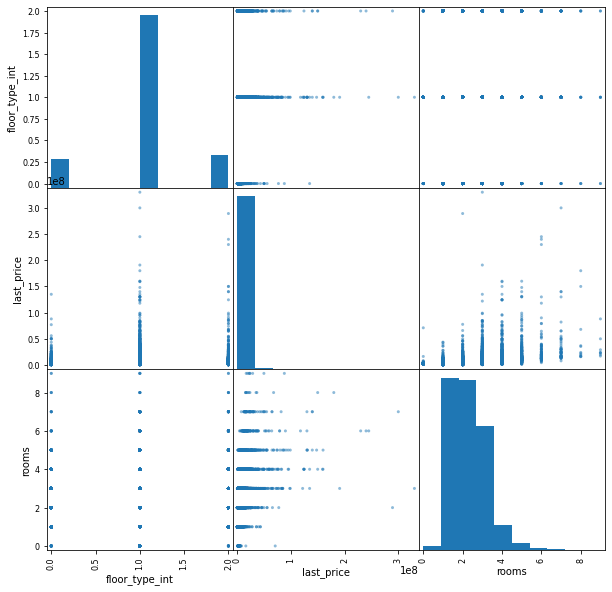

In [118]:
pd.plotting.scatter_matrix(data_table_rooms_floor, figsize=(10, 10));

Рассмотрим второй столбец матрицы диаграмм рассеяния. Обе диаграммы имеют вид параллельных столбцов.

На диаграмме типов этажей и цен видно, что цена не зависит от этажа, на котором она располагается, т.к. вне зависимости от типа этажа присутствуют и большие, и маленькие значения. Видно различие только в количестве объявлений - квартиры чаще продаются на первом этаже, чем на последнем, и продаваемых квартир с типом 'другой' больше, чем квартир на первом и последнем этажах.

На диаграмме количества комнат и цены видна зависимость - чем больше комнат, тем выше цена, т.к. с увеличением количества комнат столбцы значений цены - их нижние и верхние пределы - стремятся вверх.

*3) 'days_exposition', 'month', 'year', 'last_price'*

In [119]:
data_table_date = data.pivot_table(index=data.index, values=['days_exposition', 'month', 'year', 'last_price'])
display(data_table_date.corr())

,days_exposition,last_price,month,year
days_exposition,1.000000,0.064976,0.012378,-0.613707
last_price,0.064976,1.000000,0.000422,-0.046903
month,0.012378,0.000422,1.000000,-0.271266
year,-0.613707,-0.046903,-0.271266,1.000000


Коэффициенты корреляции цены со сроком размещения объявления, месяцем и годом публикации близки к нулю. Это значит, на итоговую цену дата объявления не влияет.

Однако можно заметить, что коэффициент корреляции срока размещения и цены на порядок выше, чем корреляция цены с месяцем и годом объявления.

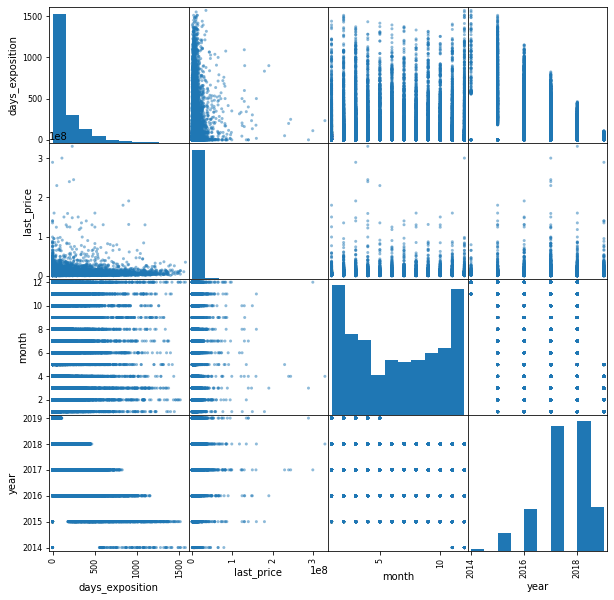

In [120]:
pd.plotting.scatter_matrix(data_table_date, figsize=(10, 10));

Рассмотрим второй столбец матрицы. На диаграмме даты объявления и цены можно увидеть, что абсолютное большинство объявлений - как по низкой цене, так и по высокой цене - были сняты с публикации в совершенно разные сроки. Можно лишь заметить, что большее количество объявлений о продаже имеют низкую цену и снимаются с публикации быстро.

Между месяцем и ценой и годом и ценой не видно практически никакой зависимости. Можно лишь заметить ненамного большее количество значений объявлений с высокой ценой в первой половине года по сравнению со второй и в 2015-2017 годах по сравнению с 2014, 2018, 2019. Этих данных слишком мало, для того, чтобы можно было делать выводы.

In [121]:
pd.DataFrame(data= [['total_area', 0.7], ['living_area', 0.61], ['kitchen_area', 0.52], ['floor_type', 0.05],\
             ['rooms', 0.4], ['days_exposition', 0.06], ['month', 0.0004], ['year', -0.04]],\
             columns = ['Фактор', 'Коэффициент корреляции']).sort_values(by='Коэффициент корреляции', ascending=False)\
.style.background_gradient('coolwarm')

,Фактор,Коэффициент корреляции
0,total_area,0.700000
1,living_area,0.610000
2,kitchen_area,0.520000
4,rooms,0.400000
5,days_exposition,0.060000
3,floor_type,0.050000
6,month,0.000400
7,year,-0.040000


Рассмотрим коэффициенты корреляции: 
- общая площадь, жилая площадь, площадь кухни, количество комнат влияют на стоимость объекта значительно - это *внутренние характеристики объекта*
- количество дней размещения объявления, тип этажа, месяц и год размещения влияют на стоимость очень слабо или не влияют вообще.

**4) Найдём среднюю стоимость одного квадратного метра у 10 населённых пунктов с наибольшим количеством объявлений.**

In [122]:
data_top_10 = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
data['1_m_price'] = data['last_price'] / data['total_area']
data['1_m_price']
one_m_price = data.pivot_table(index=data.query('locality_name in @data_top_10.index')['locality_name'], \
                             values='1_m_price', aggfunc='median').sort_values(by='1_m_price', ascending=False)
one_m_price

,1_m_price
locality_name,
Санкт-Петербург,104739.166541
Пушкин,99865.712506
Кудрово,95675.473579
Парголово,91642.857143
Мурино,86231.884058
Шушары,76923.076923
Колпино,74723.748474
Гатчина,67796.610169
Всеволожск,65789.473684


In [123]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15622,5500000.0
Мурино,587,3400000.0
Кудрово,470,3890000.0
Шушары,439,3950000.0
Всеволожск,393,3450000.0
Пушкин,366,5165000.0
Колпино,336,3600000.0
Парголово,327,4100000.0
Гатчина,307,3100000.0


Наибольшая цена 1 кв.м. в Санкт-Петербурге - 104739 руб.
Наименьшая цена 1 кв.м. в Выборге - 58357 руб.

**5) Определим, как стоимость объектов зависит от расстояния до центра Санкт-Петербурга.**

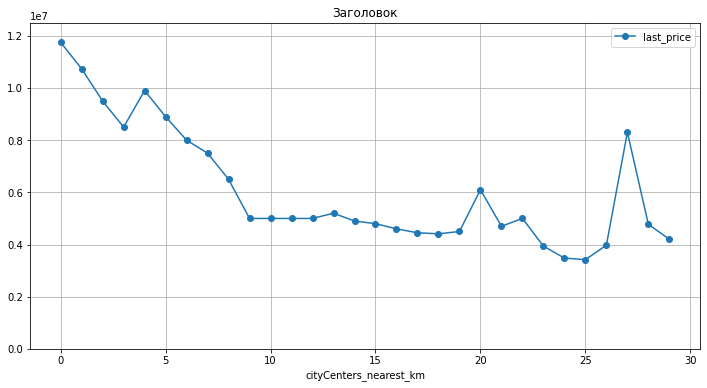

In [129]:
data_spb_corr = data.query('locality_name == "Санкт-Петербург"')\
.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
data_spb_corr.plot(y='last_price', style='o-', grid=True, ylim=(0, 12500000), figsize=(12, 6), title = 'Заголовок');

Построим график изменения цен на квартиры в зависимости от расстояния до центра города.

- наибольшие цены у квартир, находящихся на небольшом расстоянии от центра города
- на расстоянии примерно 4 км есть пик значений цен, находящийся примерно на уровне 1 млн. руб.
- на расстоянии 20 км есть пик значений цен на квартиры, находящийся примерно на уровне 600 тыс. руб.
- на расстоянии примерно 27 км есть пик значений цен, находящийся примерно на уровне 850 тыс. руб.
- на промежутке от 8 км до 19 км значения цен колеблются слабо
- на промежутках от 0 км до примерно 3 км и от примерно 4 км до примерно 9 км значения цен стремительно падают


Вывод: в общем случае при увеличении расстояния от центра города стоимость объектов снижается. Однако, на некоторых расстояниях присутствуют нетипично высокие цены объектов. Как мы уже выяснили, цена объекта зависит от её внутренних характеристик или от территориального расположения по отношению к различным объектам социальной инфраструктуры. Поэтому, возможно, в определённых районах города имеются районы с наличием этих условий, что влияет на стоимость объектов.

### Общие выводы

Цена квартиры зависит от нескольких важных факторов:
- от площади квартиры, жилой площади и площади кухни. Больше всего цена квартиры коррелирует с её общей площадью - это основной фактор. Чуть меньшую корреляцию с ценой имеет жилая площадь, так как в ней люди проводят большую часть своего времени. Наименьшую корреляцию, но примерно равную другим, имеет корреляция площади кухни с ценой, т.к. она напрямую зависит от общей площади и жилой площади.
- от количества комнат. Это, скорее всего, производный фактор от фактора площадей квартиры. Логично, что чем больше комнат, тем больше площадь, и, соответственно, тем больше цена.
- от расстояния до центра города. Чем ближе к центру, тем выше цена квартиры, так как, очевидно, жить в районе, близком к центру, намного удобнее, чем на окраине.
- от населённого пункта. Зависит от того, в каком населённом пункте располагается жильё. В большом городе цена на квартиру будет больше, чем в маленьком посёлке.

Такие факторы, как : тип этажа, общее количество этажей, дата размещения, месяц и год размещения не влияют или влияют на цену очень слабо.

Таким образом, цена квартиры зависит от её внутренних характеристик и территориального расположения. Этаж квартиры и время размещения объявления не влияют на цену.
Квартиры любых цен продаются быстро, однако, есть квартиры, которые продаются намного дольше. Существует закономерность: с увеличением количества времени размещения объявления падает цена на квартиры.

1) Были изучены параметры объектов с помощью графиков. Были найдены закономерности:

- чаще всего продаются квартиры, близкие по площади к "хрущёвкам"
- возможно, в объявлениях продаются квартиры-студии или квартиры без ванных
- чаще всего продаются 1-, 2-х и 3-х комнатные квартиры. 1- и 2-х комнатные квартиры продаются значительно чаще, чем 3-х комнатные
- квартиры продаются чаще всего в 5-этажных домах или на первых этажах. В многоэтажных домах на верхних этажах квартиры продаются заметно реже.
- квартиры на первом и последнем этажах продаются примерно в 6 раз реже, чем квартиры на других этажах.

2) Было изучено количество времени размещения объявлений и найдены быстрые и необычно долгие продажи:
- продажи, длившиеся больше, чем 462 дня, считаются необычно долгими
- продажи, длившиеся меньше, чем 73 дня, считаются быстрыми

3) Были найдены факторы, сильнее всего влияющие на стоимость объекта:
- общая площадь
- жилая площадь
- площадь кухни
- количество комнат

4) Была сравнена стоимость 1 кв.м. в разных населённых пунктах.
Наибольшая цена 1 кв.м. в Санкт-Петербурге - 104739 руб.
Наименьшая цена 1 кв.м. в Выборге - 58357 руб.

5) Была найдена закономерность зависимости стоимости объектов от расстояния до центра Санкт-Петербурга: при увеличении расстояния от центра города стоимость объектов снижается. Однако, на некоторых расстояниях присутствуют нетипично высокие цены объектов, причиной которых могут выступать:
- территориальное расположение по отношению к различным объектам социальной инфраструктуры
- внутренние характеристики объектов.